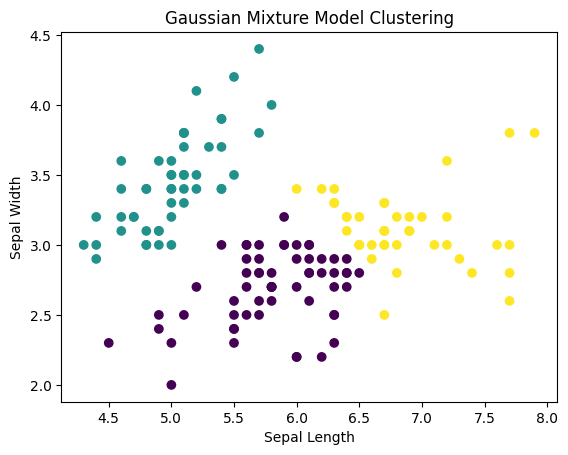

In [5]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris.data[:, :2] #using only sepal length and sepal width

# Fit GMM with 3 components (clusters)
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

# Predict the labels (cluster assignments)
labels = gmm.predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Gaussian Mixture Model Clustering')
plt.show()

In [6]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()

data_y = pd.DataFrame(iris.target)
data_y.columns = ['original_label']

data_X = pd.DataFrame(iris.data)
data_X.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

train = pd.concat([data_X, data_y], axis=1)

train.head()

,Sepal length,Sepal width,Petal length,Petal width,original_label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


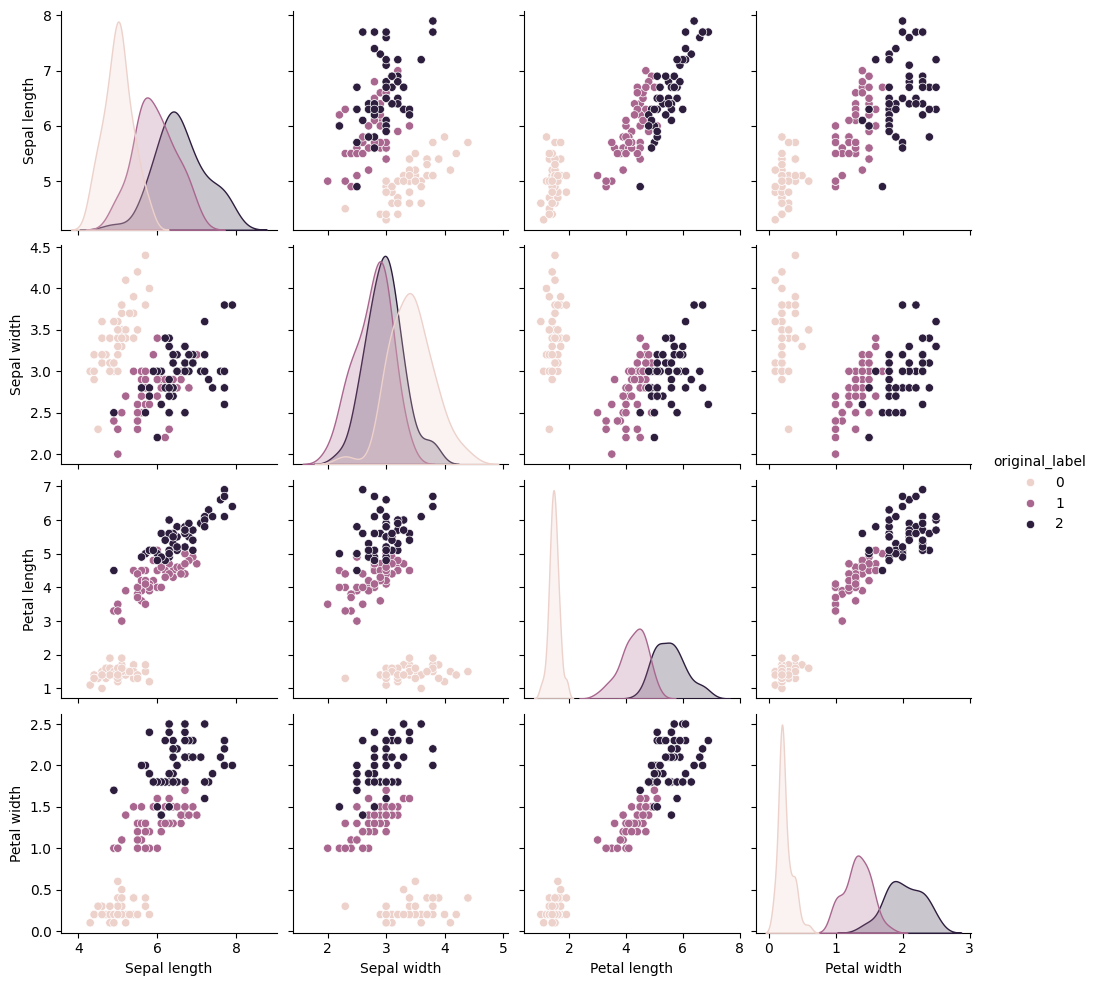

In [7]:
sns.color_palette("pastel")
sns.pairplot(train, hue='original_label')
plt.show()

In [11]:
TRAIN_LABEL_COL = "original_label"
TRAIN_FEATURES = [col for col in train.columns if col != TRAIN_LABEL_COL]
X = train[TRAIN_FEATURES]
y = train[TRAIN_LABEL_COL]

dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred = dbscan.fit_predict(X)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['pred_label']

val = pd.concat([X, y_pred_df], axis=1)

print(val)

     Sepal length  Sepal width  Petal length  Petal width  pred_label
0             5.1          3.5           1.4          0.2           0
1             4.9          3.0           1.4          0.2           0
2             4.7          3.2           1.3          0.2           0
3             4.6          3.1           1.5          0.2           0
4             5.0          3.6           1.4          0.2           0
..            ...          ...           ...          ...         ...
145           6.7          3.0           5.2          2.3           1
146           6.3          2.5           5.0          1.9           1
147           6.5          3.0           5.2          2.0           1
148           6.2          3.4           5.4          2.3           1
149           5.9          3.0           5.1          1.8           1

[150 rows x 5 columns]


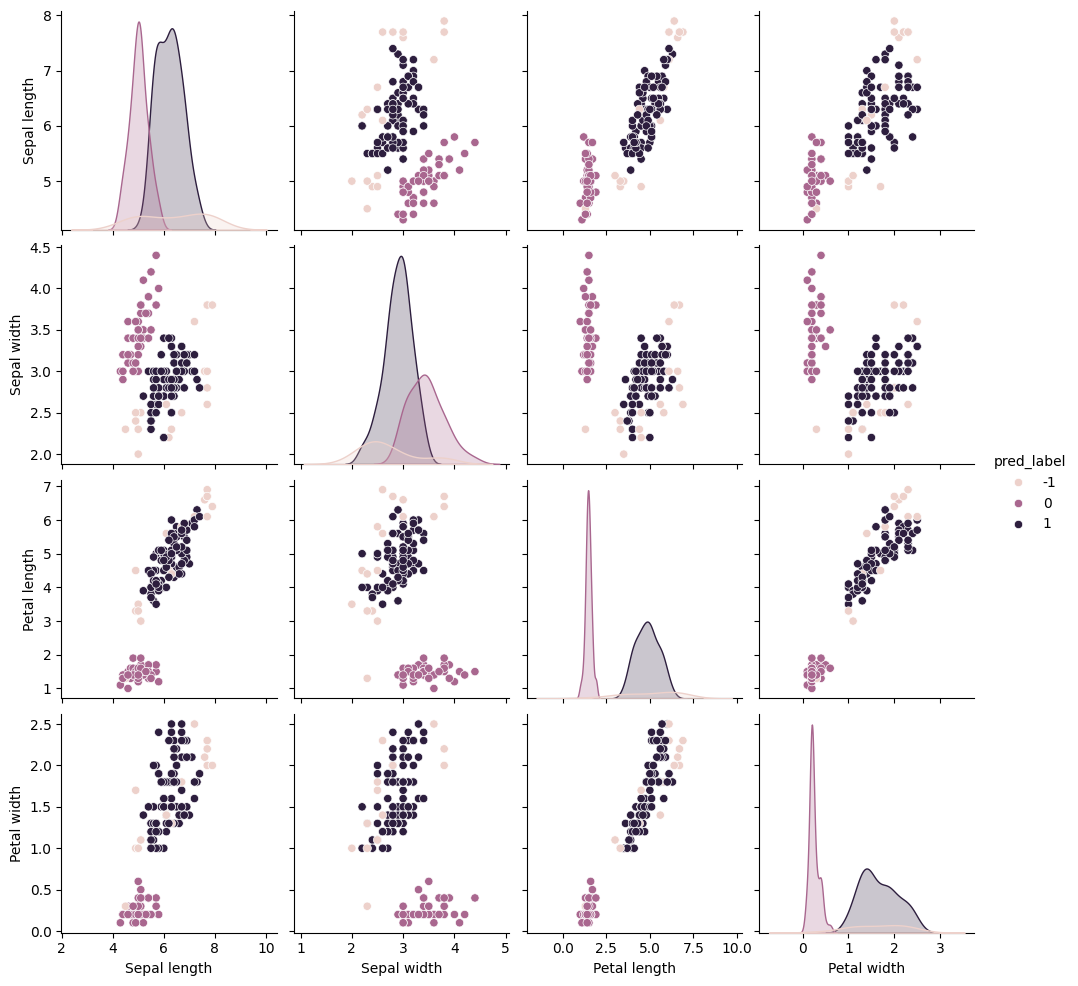

In [12]:
sns.color_palette("pastel")
sns.pairplot(val, hue='pred_label')
plt.show()